### Residuals from M1 and M2 with parameter values estimated in PyTorch

In [1]:
import torch
import pandas as pd
import models
import matplotlib.pyplot as plt

In [2]:
def read_data(path='data/nf.csv'):
    df = pd.read_csv(path, sep=';', index_col=0)
    y = df[['u', 'x1', 'x3']].values
    y = torch.tensor(y, dtype=torch.float32)
    return df, y

def train_model(model, y, num_epochs=10):
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
    state = torch.zeros(3, 1)
    for i in range(num_epochs):
        num_samples = len(y)
        for j in range(len(y)):
            # Forward pass      
            state, r = model(y[j], state)
            # Compute loss
            loss = r ** 2
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # Print progress
            if (j+1) % 20 == 0:
                print (f'Epoch [{i * num_samples + j + 1}/{num_samples * num_epochs}], Loss: {loss.item():.4f}')

def predict(model, y):
    states = []
    rs = []
    state = torch.zeros(3, 1)
    for i in range(len(y)):
        state, r = model(y[i], state)
        states.append(state.detach().numpy())
        rs.append(r[0][0].detach().numpy())
    states = pd.DataFrame(states, columns=['x1', 'x2', 'x3'])
    states['r'] = rs
    return states

In [3]:
df_nf, y_train = read_data()
df_f1, y_f1 = read_data('data/f1.csv')
df_f2, y_f2 = read_data('data/f2.csv')

#### ResGen1

In [49]:
# training can be numerically unstable - seed selected for a stable run
# remark: this can be in general not reproducible on others systems/processors/pytorch versions
# in that case please try another seed values
torch.manual_seed(4);

In [50]:
model1 = models.ResGen1()
train_model(model1, y_train)

Epoch [20/1990], Loss: 0.9364
Epoch [40/1990], Loss: 0.2481
Epoch [60/1990], Loss: 0.0612
Epoch [80/1990], Loss: 0.1759
Epoch [100/1990], Loss: 0.1058
Epoch [120/1990], Loss: 0.0005
Epoch [140/1990], Loss: 0.0271
Epoch [160/1990], Loss: 0.1319
Epoch [180/1990], Loss: 0.0072
Epoch [219/1990], Loss: 0.0270
Epoch [239/1990], Loss: 0.0553
Epoch [259/1990], Loss: 0.0380
Epoch [279/1990], Loss: 0.0305
Epoch [299/1990], Loss: 0.0487
Epoch [319/1990], Loss: 0.0288
Epoch [339/1990], Loss: 0.0174
Epoch [359/1990], Loss: 0.0637
Epoch [379/1990], Loss: 0.0081
Epoch [418/1990], Loss: 0.0516
Epoch [438/1990], Loss: 0.0189
Epoch [458/1990], Loss: 0.0230
Epoch [478/1990], Loss: 0.0200
Epoch [498/1990], Loss: 0.0194
Epoch [518/1990], Loss: 0.0183
Epoch [538/1990], Loss: 0.0073
Epoch [558/1990], Loss: 0.0314
Epoch [578/1990], Loss: 0.0043
Epoch [617/1990], Loss: 0.0663
Epoch [637/1990], Loss: 0.0054
Epoch [657/1990], Loss: 0.0123
Epoch [677/1990], Loss: 0.0127
Epoch [697/1990], Loss: 0.0074
Epoch [717/1

In [51]:
# x2 = 10.0*dx3 + 2.0*x3 # e3
print("x2 (x3, dx3) ", model1.linear1.weight.detach().numpy())
print("x2 bias ", model1.linear1.bias.detach().numpy())
# dx1 = u - 0.2*x1 - 0.1*x2 # e1
print("dx1 (u, x1, x2) ", model1.linear2.weight.detach().numpy())
print("dx1 bias ", model1.linear2.bias.detach().numpy())

x2 (x3, dx3)  [[-0.5799936  -0.98561084]]
x2 bias  [0.]
dx1 (u, x1, x2)  [[ 1.1754457  -0.31884828 -0.5637544 ]]
dx1 bias  [0.00091753]


In [52]:
states_nf = predict(model1, y_train)
states_f1 = predict(model1, y_f1)
states_f2 = predict(model1, y_f2)

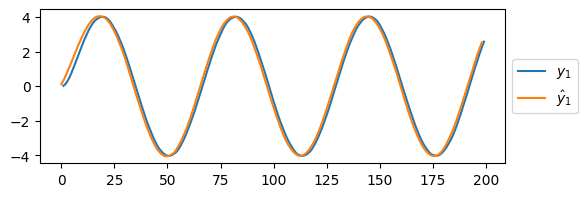

In [53]:
# x1 estimation by ResGen2
plt.figure(figsize=(6, 2))
plt.plot(df_nf['x1'], label='$y_1$');
plt.plot(states_nf['x1'], label='$\hat{y}_1$');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.show()

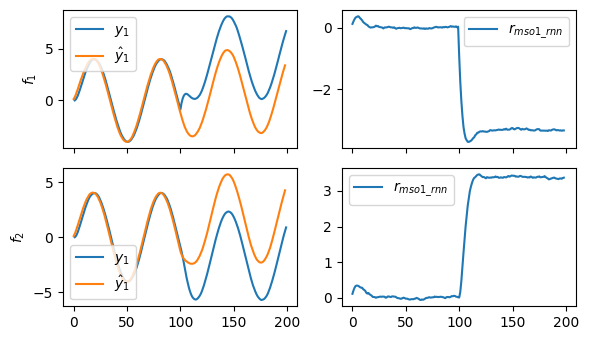

In [54]:
fig, axs = plt.subplots(2, 2, figsize=(6, 3.5), sharex=True)

axs[0, 0].plot(df_f1['x1'], label='$y_1$')
axs[0, 0].plot(states_f1['x1'], label='$\hat{y}_1$')
axs[0, 0].legend()
axs[0, 0].set_ylabel('$f_1$')
axs[0, 1].plot(states_f1['r'], label='$r_{mso1\_rnn}$')
axs[0, 1].legend()
axs[1, 0].plot(df_f2['x1'], label='$y_1$')
axs[1, 0].plot(states_f2['x1'], label='$\hat{y}_1$')
axs[1, 0].legend(loc='lower left')
axs[1, 0].set_ylabel('$f_2$')
axs[1, 1].plot(states_f2['r'], label='$r_{mso1\_rnn}$') 
axs[1, 1].legend()
plt.tight_layout()
plt.savefig('pic/mso1_rnn_seed4.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [61]:
torch.manual_seed(3);
model1 = models.ResGen1()
train_model(model1, y_train)

Epoch [20/1990], Loss: 0.0204
Epoch [40/1990], Loss: 3.0255
Epoch [60/1990], Loss: 1.2614
Epoch [80/1990], Loss: 0.0669
Epoch [100/1990], Loss: 1.6487
Epoch [120/1990], Loss: 1.5543
Epoch [140/1990], Loss: 0.1435
Epoch [160/1990], Loss: 1.8143
Epoch [180/1990], Loss: 0.8460
Epoch [219/1990], Loss: 0.9061
Epoch [239/1990], Loss: 0.7519
Epoch [259/1990], Loss: 1.3570
Epoch [279/1990], Loss: 0.0306
Epoch [299/1990], Loss: 0.6804
Epoch [319/1990], Loss: 0.4132
Epoch [339/1990], Loss: 0.0324
Epoch [359/1990], Loss: 0.5592
Epoch [379/1990], Loss: 0.1232
Epoch [418/1990], Loss: 0.3524
Epoch [438/1990], Loss: 0.3049
Epoch [458/1990], Loss: 0.3315
Epoch [478/1990], Loss: 0.0121
Epoch [498/1990], Loss: 0.1642
Epoch [518/1990], Loss: 0.0266
Epoch [538/1990], Loss: 0.0028
Epoch [558/1990], Loss: 0.0974
Epoch [578/1990], Loss: 0.0079
Epoch [617/1990], Loss: 0.1909
Epoch [637/1990], Loss: 0.0918
Epoch [657/1990], Loss: 0.0736
Epoch [677/1990], Loss: 0.0153
Epoch [697/1990], Loss: 0.0142
Epoch [717/1

In [62]:
states_nf = predict(model1, y_train)
states_f1 = predict(model1, y_f1)
states_f2 = predict(model1, y_f2)

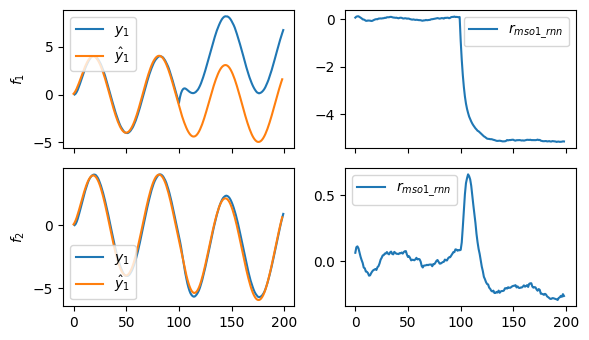

In [63]:
fig, axs = plt.subplots(2, 2, figsize=(6, 3.5), sharex=True)

axs[0, 0].plot(df_f1['x1'], label='$y_1$')
axs[0, 0].plot(states_f1['x1'], label='$\hat{y}_1$')
axs[0, 0].legend()
axs[0, 0].set_ylabel('$f_1$')
axs[0, 1].plot(states_f1['r'], label='$r_{mso1\_rnn}$')
axs[0, 1].legend()
axs[1, 0].plot(df_f2['x1'], label='$y_1$')
axs[1, 0].plot(states_f2['x1'], label='$\hat{y}_1$')
axs[1, 0].legend(loc='lower left')
axs[1, 0].set_ylabel('$f_2$')
axs[1, 1].plot(states_f2['r'], label='$r_{mso1\_rnn}$') 
axs[1, 1].legend()
plt.tight_layout()
plt.savefig('pic/mso1_rnn_seed3.pdf', dpi=300, bbox_inches='tight')
plt.show()

#### ResGen2

In [55]:
torch.manual_seed(13);

In [56]:
model2 = models.ResGen2()
train_model(model2, y_train)

Epoch [20/1990], Loss: 11.9004
Epoch [40/1990], Loss: 2.9809
Epoch [60/1990], Loss: 3.8438
Epoch [80/1990], Loss: 10.7289
Epoch [100/1990], Loss: 0.6966
Epoch [120/1990], Loss: 6.5457
Epoch [140/1990], Loss: 8.1547
Epoch [160/1990], Loss: 0.0000
Epoch [180/1990], Loss: 8.1276
Epoch [219/1990], Loss: 8.8687
Epoch [239/1990], Loss: 2.6230
Epoch [259/1990], Loss: 2.4122
Epoch [279/1990], Loss: 7.4415
Epoch [299/1990], Loss: 0.7456
Epoch [319/1990], Loss: 3.7476
Epoch [339/1990], Loss: 4.9690
Epoch [359/1990], Loss: 0.1123
Epoch [379/1990], Loss: 3.6571
Epoch [418/1990], Loss: 3.6397
Epoch [438/1990], Loss: 1.9917
Epoch [458/1990], Loss: 0.2489
Epoch [478/1990], Loss: 2.3162
Epoch [498/1990], Loss: 1.1406
Epoch [518/1990], Loss: 0.2095
Epoch [538/1990], Loss: 1.1744
Epoch [558/1990], Loss: 1.1114
Epoch [578/1990], Loss: 0.1145
Epoch [617/1990], Loss: 0.3173
Epoch [637/1990], Loss: 1.3507
Epoch [657/1990], Loss: 0.1433
Epoch [677/1990], Loss: 0.5341
Epoch [697/1990], Loss: 1.0449
Epoch [717

In [57]:
# dx1 = u - 0.2*x1 - 0.1*x2 # e1
print("dx1 (u, x1, x2, x3) weights: ", model2.linear1.weight.detach().numpy())
print("dx1 bias ", model2.linear1.bias.detach().numpy())
# dx2 = 0.1*x1 - 0.2*x2 - 0.1*x3 # e2
print("dx2 (u, x1, x2, x3) weights:", model2.linear2.weight.detach().numpy())
print("dx2 bias ", model2.linear2.bias.detach().numpy())

dx1 (u, x1, x2, x3) weights:  [[0.82386637 0.08149108 0.4490807  1.0705624 ]]
dx1 bias  [-3.5246194e-05]
dx2 (u, x1, x2, x3) weights: [[ 0.06957269 -0.46106935 -0.49396634 -0.3219942 ]]
dx2 bias  [0.]


In [58]:
states_nf = predict(model2, y_train)
states_f1 = predict(model2, y_f1)
states_f2 = predict(model2, y_f2)

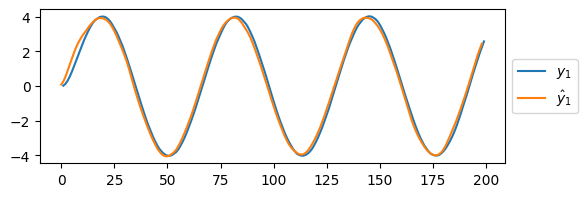

In [59]:
# x1 estimation by ResGen2
plt.figure(figsize=(6, 2))
plt.plot(df_nf['x1'], label='$y_1$');
plt.plot(states_nf['x1'], label='$\hat{y}_1$');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.show()

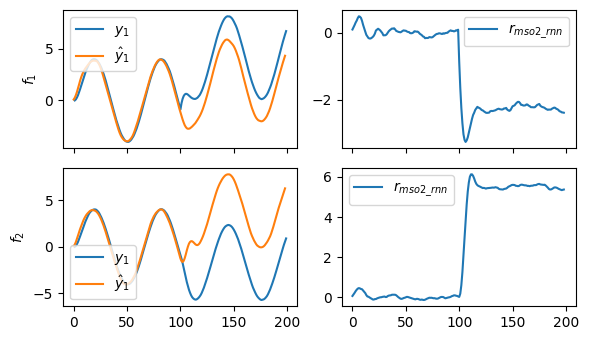

In [60]:
fig, axs = plt.subplots(2, 2, figsize=(6, 3.5), sharex=True)

axs[0, 0].plot(df_f1['x1'], label='$y_1$')
axs[0, 0].plot(states_f1['x1'], label='$\hat{y}_1$')
axs[0, 0].legend()
axs[0, 0].set_ylabel('$f_1$')
axs[0, 1].plot(states_f1['r'], label='$r_{mso2\_rnn}$')
axs[0, 1].legend()
axs[1, 0].plot(df_f2['x1'], label='$y_1$')
axs[1, 0].plot(states_f2['x1'], label='$\hat{y}_1$')
axs[1, 0].legend(loc='lower left')
axs[1, 0].set_ylabel('$f_2$')
axs[1, 1].plot(states_f2['r'], label='$r_{mso2\_rnn}$') 
axs[1, 1].legend()
plt.tight_layout()
plt.savefig('pic/mso2_rnn.pdf', dpi=300, bbox_inches='tight')
plt.show()